In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
print("Devices:", tf.config.list_physical_devices())

if tf.config.list_physical_devices('GPU'):
    print("✅ GPU Terdeteksi dan Siap Digunakan")
else:
    print("❌ GPU Tidak Terdeteksi, Pakai CPU")

Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
✅ GPU Terdeteksi dan Siap Digunakan


# 1. Memuat Data

### Preproceccing Data

In [3]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        try:
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            img = img.resize((128, 128))
            img = img.convert('RGB')
            img = np.array(img) / 255.0
            images.append(img)
        except Exception as e:
            print(f"Error memproses file {filename}: {e}, dilewati...")
            continue
    return images

In [4]:
retina_normal_image = load_images("D:\\Data Sains dan Analitis\\Pertemuan 16 Project Akhir\\Data\\Data new\\Normal")

In [5]:
retina_retinopaty_image = load_images("D:\\Data Sains dan Analitis\\Pertemuan 16 Project Akhir\\Data\\Data new\\Retinopathy")

In [6]:
print("Jumlah gambar:", len(retina_normal_image))
print("Jumlah gambar:", len(retina_retinopaty_image))

Jumlah gambar: 1000
Jumlah gambar: 1000


### Tampilakan Gambar

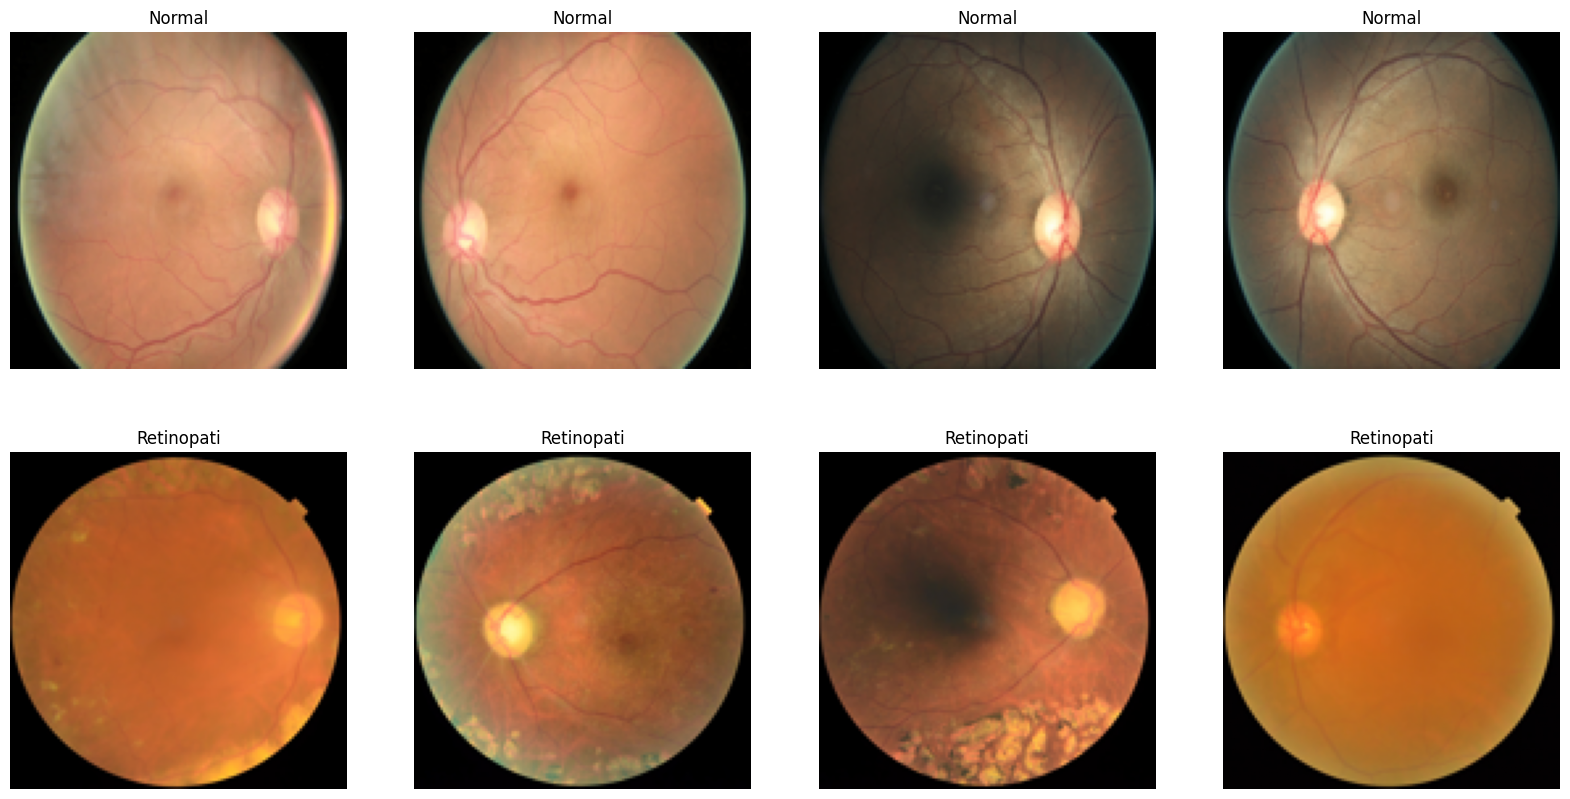

In [7]:
if len(retina_normal_image) >= 5 and len(retina_retinopaty_image) >= 5:
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    for i in range(4):
        rentangtmpil = 900 + i
        axes[0,i].imshow(retina_normal_image[rentangtmpil])
        axes[0,i].set_title("Normal")
        axes[0,i].axis('off')
        
    for i in range(4):
        rentangtmpil = 900 + i
        axes[1,i].imshow(retina_retinopaty_image[rentangtmpil])
        axes[1,i].set_title("Retinopati")
        axes[1,i].axis("off")

    plt.show()
else :
    print("Gambar tidak cukup")


# 2. Labelling Data

In [8]:
def LabellingGambar(retina_normal, retina_retinopathy):
    retina_normal_label = np.zeros(len(retina_normal))
    retina_retinopaty_label = np.ones(len(retina_retinopathy))
    return retina_normal_label, retina_retinopaty_label

retina_normal_label, retina_retinopaty_label = LabellingGambar(retina_normal_image, retina_retinopaty_image)

### Hasil Label

In [9]:
retina_normal_label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [10]:
retina_retinopaty_label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### Menambahakan Data

In [11]:
print("==== JUMLAH TOTAL DATA PERKATEGORI ====")
print("Jumlah data normal :",len(retina_normal_image))
print("Jumlah data retinopati :",len(retina_retinopaty_image))

==== JUMLAH TOTAL DATA PERKATEGORI ====
Jumlah data normal : 1000
Jumlah data retinopati : 1000


In [12]:
data = retina_normal_image + retina_retinopaty_image
labels = np.concatenate((retina_normal_label, retina_retinopaty_label), axis=0)

In [13]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [14]:
print(len(labels))

2000


# 3. Spliting Data Training Dan Val

In [15]:
X = np.array(data)
y = np.array(labels)

### Membagi data train 90% dan data testing 10%

In [16]:
X_train_full , X_test , y_train_full , y_test = train_test_split(X, y, test_size=0.1, random_state=42 , stratify=y)

### Membagi 10 persen menjadi data validasi

In [17]:
# 10% dari train_full jadi validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, stratify=y_train_full, random_state=42)

In [18]:
train_batch = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_batch = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)
test_batch = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

In [18]:
print("Train:", sum(1 for _ in train_batch.unbatch()))
print("Validation:", sum(1 for _ in val_batch.unbatch()))
print("Test:", sum(1 for _ in test_batch.unbatch()))


Train: 1620
Validation: 180
Test: 200


# 4. Modelling

### Model Arsitektur

In [19]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

In [ ]:

from tensorflow.keras.layers import GlobalAveragePooling2D

model = Sequential()

# Conv Block 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

# Conv Block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

# Conv Block 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

# Conv Block 4 
model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

# Fully Connected
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


### Hasil Model

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                        

# 5. Melatih Data

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

history = model.fit(train_batch, epochs=100, validation_data=val_batch, verbose=1)

Epoch 1/100
51/51 [==============================] - 8s 58ms/step - loss: 1.1109 - accuracy: 0.5525 - val_loss: 1.0598 - val_accuracy: 0.4722
Epoch 2/100
51/51 [==============================] - 2s 44ms/step - loss: 1.0511 - accuracy: 0.5438 - val_loss: 1.0352 - val_accuracy: 0.5056
Epoch 3/100
51/51 [==============================] - 2s 44ms/step - loss: 1.0091 - accuracy: 0.5630 - val_loss: 1.0085 - val_accuracy: 0.4944
Epoch 4/100
51/51 [==============================] - 2s 44ms/step - loss: 0.9693 - accuracy: 0.5630 - val_loss: 0.9668 - val_accuracy: 0.5667
Epoch 5/100
51/51 [==============================] - 2s 43ms/step - loss: 0.9442 - accuracy: 0.5679 - val_loss: 0.9496 - val_accuracy: 0.5000
Epoch 6/100
51/51 [==============================] - 2s 43ms/step - loss: 0.9213 - accuracy: 0.5698 - val_loss: 0.9132 - val_accuracy: 0.5167
Epoch 7/100
51/51 [==============================] - 2s 43ms/step - loss: 0.8858 - accuracy: 0.5883 - val_loss: 0.8937 - val_accuracy: 0.5333
Epoch 

In [23]:
best_epoch = np.argmax(history.history['val_accuracy'])
best_val_acc = history.history['val_accuracy'][best_epoch]

print(f"Best epoch: {best_epoch+1}")
print(f"Best validation accuracy: {best_val_acc*100:.2f}%")

Best epoch: 94
Best validation accuracy: 83.33%


# 6.Evaluasi Model

In [ ]:
# Evaluasi model di data testing setelah training selesai
evaluasi = model.evaluate(test_batch, verbose=1)

print(f"Test Loss: {evaluasi[0]:.4f}%")
print(f"Test Accuracy: {evaluasi[1]*100:.2f}%")

7/7 [==============================] - 0s 42ms/step - loss: 0.5462 - accuracy: 0.8250
Test Loss: 54.6192%
Test Accuracy: 82.50%


In [25]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

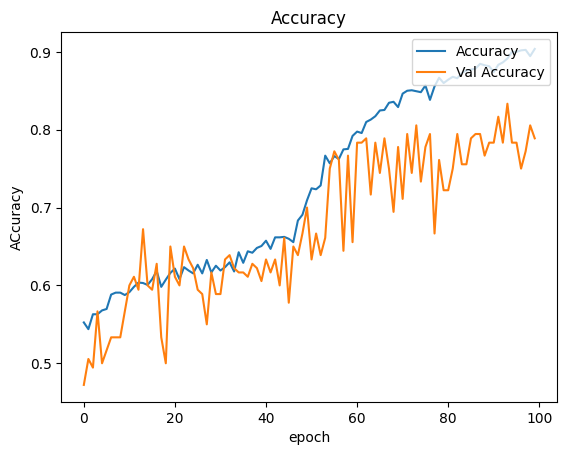

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('ACcuracy')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

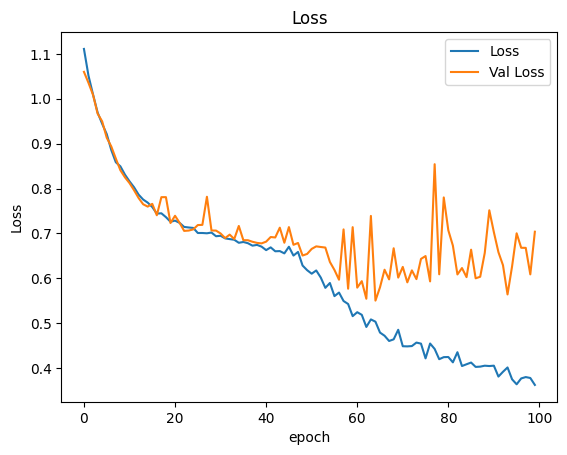

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(test_batch)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test_batch], axis=0)

print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))


7/7 [==============================] - 0s 14ms/step
[[100   0]
 [100   0]]
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       100
         1.0       0.00      0.00      0.00       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



d:\MiniConda\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\MiniConda\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\MiniConda\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
model.save('retina_v2.h5', include_optimizer=False)

In [44]:
import time

# Numpy
arr_np = np.random.rand(1000, 1000)
start = time.time()
arr_np = arr_np * 2
print("Waktu numpy:", time.time() - start)

# List biasa
arr_list = [[x * 2 for x in row] for row in arr_np.tolist()]
print("Waktu list:", time.time() - start)


Waktu numpy: 0.0039844512939453125
Waktu list: 0.11025190353393555
